<h1>Erik Blood Development Notebook</h1>
<h2>Using Guassian Tree Regression</h2>
<p>In this notebook I will be experimenting with the data set </p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

<h2> Read data set, assign features and split into X and y </h2>

In [2]:
df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

In [3]:
df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index
0,2014-01-01,1440,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918
...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620


In [56]:
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF','MORT30US']
#feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US']
X = df[feature_labels]
y = df[['FORECLOSURE']]
print(X.shape)
print(y.shape)
print(X.head())
print(y.head())

(105, 5)
(105, 1)
   DATE_DELTA  CAUR  Average DGS       DFF  MORT30US
0         0.0   8.2     2.858095  0.071613    4.4320
1        31.0   8.1     2.709474  0.066429    4.3025
2        59.0   8.0     2.723333  0.078065    4.3425
3        90.0   7.8     2.705238  0.090333    4.3375
4       120.0   7.7     2.559048  0.087097    4.1920
   FORECLOSURE
0         1440
1          524
2          611
3          328
4          503


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test)

(78, 5)
(78, 1)
     DATE_DELTA  CAUR  Average DGS       DFF  MORT30US
29        882.0   5.5     1.644091  0.377667    3.5680
65       1977.0   4.0     2.074000  2.377667    3.8025
16        485.0   6.4     2.197500  0.123226    3.8400
10        304.0   7.1     2.325556  0.092000    3.9975
101      3073.0   4.2     3.143333  1.205000    5.5220
2          59.0   8.0     2.723333  0.078065    4.3425
13        396.0   6.7     1.975263  0.110714    3.7100
24        730.0   5.7     2.085263  0.342903    3.8725
89       2708.0   7.9     1.519091  0.078000    2.9750
5         151.0   7.6     2.598571  0.095667    4.1625
19        577.0   6.0     2.167143  0.138065    3.9050
85       2588.0   8.6     1.257895  0.075714    2.8100
99       3012.0   4.6     2.747500  0.330000    4.9825
53       1612.0   4.2     2.912381  1.819667    4.5700
91       2769.0   7.0     1.283182  0.092258    2.8425
43       1308.0   4.8     2.209130  1.157097    3.8800
41       1247.0   4.9     2.186818  1.040000    3

<h2>Plot results</h2>

In [58]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/home/shram/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=1)

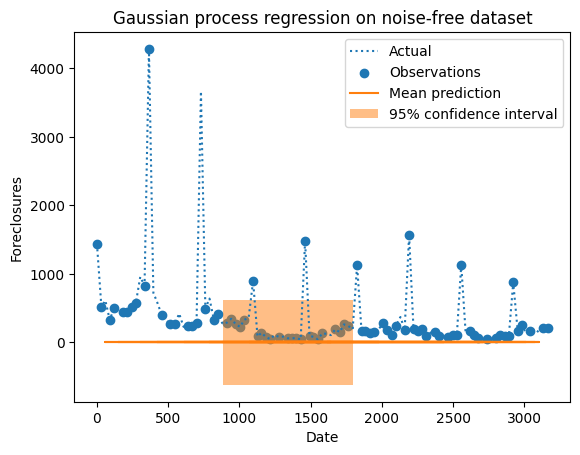

In [59]:
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)

plt.plot(X['DATE_DELTA'], y, label=r"Actual", linestyle="dotted")
plt.scatter(X_train['DATE_DELTA'], y_train, label="Observations")
plt.plot(X_test['DATE_DELTA'], mean_prediction, label="Mean prediction")
plt.fill_between(
    X_test['DATE_DELTA'],
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.50,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Foreclosures")
_ = plt.title("Gaussian process regression on noise-free dataset")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

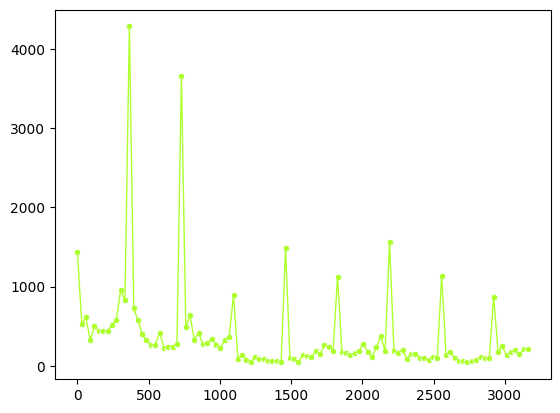

In [69]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

plt.xlabel("Date")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()